<a href="https://colab.research.google.com/github/Arfanbashashaik/DAA-Hands-On-2/blob/main/benchmarkmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPU:1physical cores,2logical cores
Memory:svmem(total=13609431040, available=12107091968, percent=11.0, used=1167478784, free=8532213760, active=770592768, inactive=3974815744, buffers=400568320, cached=3509170176, shared=1638400, slab=231645184)


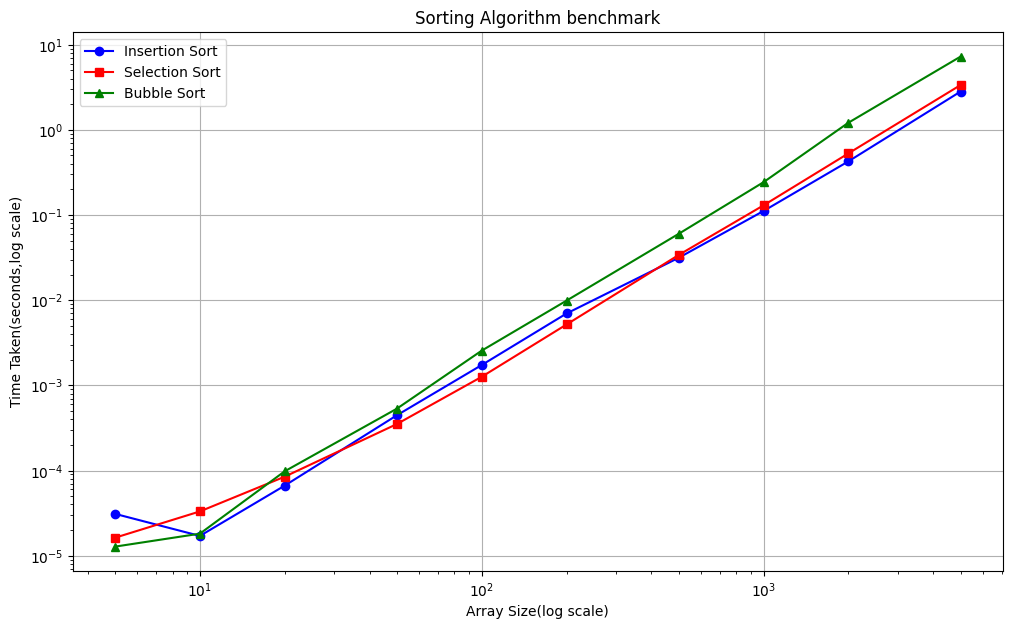

In [5]:
def selection_sort(arr):
  n=len(arr)
  for i in range(n):
    min_index=i
    for j in range(i+1,n):
      if arr[j]<arr[min_index]:
        min_index=j
    arr[i],arr[min_index]=arr[min_index],arr[i]

def bubble_sort(arr):
  n=len(arr)
  for i in range(n):
    swapped=False
    for j in range(n-i-1):
      if arr[j]>arr[j+1]:
        arr[j],arr[j+1]=arr[j+1],arr[j]
        swapped=True
    if not swapped:
        break
def insertion_sort(arr):
  for i in range(1,len(arr)):
    current_value = arr[i]
    position=i
    while position>0 and arr[position-1]>current_value:
      arr[position]=arr[position-1]
      position-=1
    arr[position]=current_value

import timeit
import matplotlib.pyplot as plt
import numpy as np
import psutil

def benchmark_sorting_algorithm(sort_function,sizes):
  results=[]
  for size in sizes:
    array=np.random.randint(0,10000,size)
    array_copy=np.copy(array)
    start_time=timeit.default_timer()
    sort_function(array_copy)
    end_time=timeit.default_timer()
    duration=end_time-start_time
    results.append(duration)
  return results

def print_system_specs():
  cpu_details=f"CPU:{psutil.cpu_count(logical=False)}physical cores,{psutil.cpu_count(logical=True)}logical cores"
  memory_details=f"Memory:{psutil.virtual_memory()}"
  print(cpu_details)
  print(memory_details)

def plot_benchmark_results(sizes,insertion_times,selection_times,bubble_times):
  plt.figure(figsize=(12,7))
  plt.plot(sizes,insertion_times,label='Insertion Sort',marker='o',linestyle='-',color='b')
  plt.plot(sizes,selection_times,label='Selection Sort',marker='s',linestyle='-',color='r')
  plt.plot(sizes,bubble_times,label='Bubble Sort',marker='^',linestyle='-',color='g')
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Array Size(log scale)')
  plt.ylabel('Time Taken(seconds,log scale)')
  plt.title('Sorting Algorithm benchmark')
  plt.legend()
  plt.grid(True)
  plt.show()

array_sizes=[5,10,20,50,100,200,500,1000,2000,5000]
insertion_sort_times=benchmark_sorting_algorithm(insertion_sort,array_sizes)
selection_sort_times=benchmark_sorting_algorithm(selection_sort,array_sizes)
bubble_sort_times=benchmark_sorting_algorithm(bubble_sort,array_sizes)
print_system_specs()
plot_benchmark_results(array_sizes,insertion_sort_times,selection_sort_times,bubble_sort_times)





